### HW 7: Bioservices

1. Create a Bioservices session

In [13]:
from bioservices import * 
#From the notes, this is how we create the session


2. Create a KEGG object

In [14]:
k = KEGG(verbose = False)
#From the notes, create an object

3. Use the 'dbinfo' method with the KEGG objects to query the term 'disease'.

In [15]:
k.dbinfo('disease')
#from the notes, use the dbinfo method

'disease          KEGG Disease Database\nds               Release 110.0+/04-19, Apr 24\n                 Kanehisa Laboratories\n                 2,723 entries\n\nlinked db        pathway\n                 brite\n                 ko\n                 hsa\n                 genome\n                 network\n                 variant\n                 drug\n                 pubmed\n'

4. Use the 'find' method to query based on the parameters 'disease' and 'non-small cell lung cancer'

In [16]:
result = k.find('disease','non-small cell lung cancer')
#from the notes using the find method 
print(k.find('disease','non-small cell lung cancer'))


ds:H00014	Non-small cell lung cancer



In [57]:
num = result.split()[0].split(':')[1]
print(num)
#isolate the disease number
#first split by white space, get the first portion
#then split by colon, and get the portion after the colon

H00014


5. Print the output to a file

In [58]:
#query based on the number from the result
query_result = k.get(num)

file = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Homeworks\BioserviesHW\Bioservices_output.txt'
#describe our path
file_out = open(file, 'w')
#open our file in write mode
file_out.write(query_result)
#write out our file
file_out.close()
#close the file!

6. Use the find method to obtain the pathway map id, by passing in the parameters "pathway" and "Non Small Cell Lung Cancer"

In [56]:
#using the find method to find pathway map id as described in notes
pathway_map_id = k.find("pathway", "non-small cell lung cancer")
print(pathway_map_id)

path:map05223	Non-small cell lung cancer



In [35]:
#to only get the map ID I will split the string, and only get what is after the colon
# Split the string by whitespace and get the second part
pathway_id = pathway_map_id.split()[0].split(':')[1]
#first split by white space, get the first portion
#then split by colon, and get the portion after the colon
print(pathway_id)

map05223


Follow the instructions on the Bioservices lesson page and import the following libraries


1. from Bio.KEGG.REST import *
2. from Bio.KEGG.KGML import KGML_parser
3. from Bio.Graphics.KGML_vis import KGMLCanvas
4. from Bio.Graphics.ColorSpiral import ColorSpiral
5. from IPython.display import Image, HTML

In [47]:
#importing the above libraries
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral
from IPython.display import Image, HTML

8. Render the pathway map image with the code Image(kegg_get("X", "image").read())

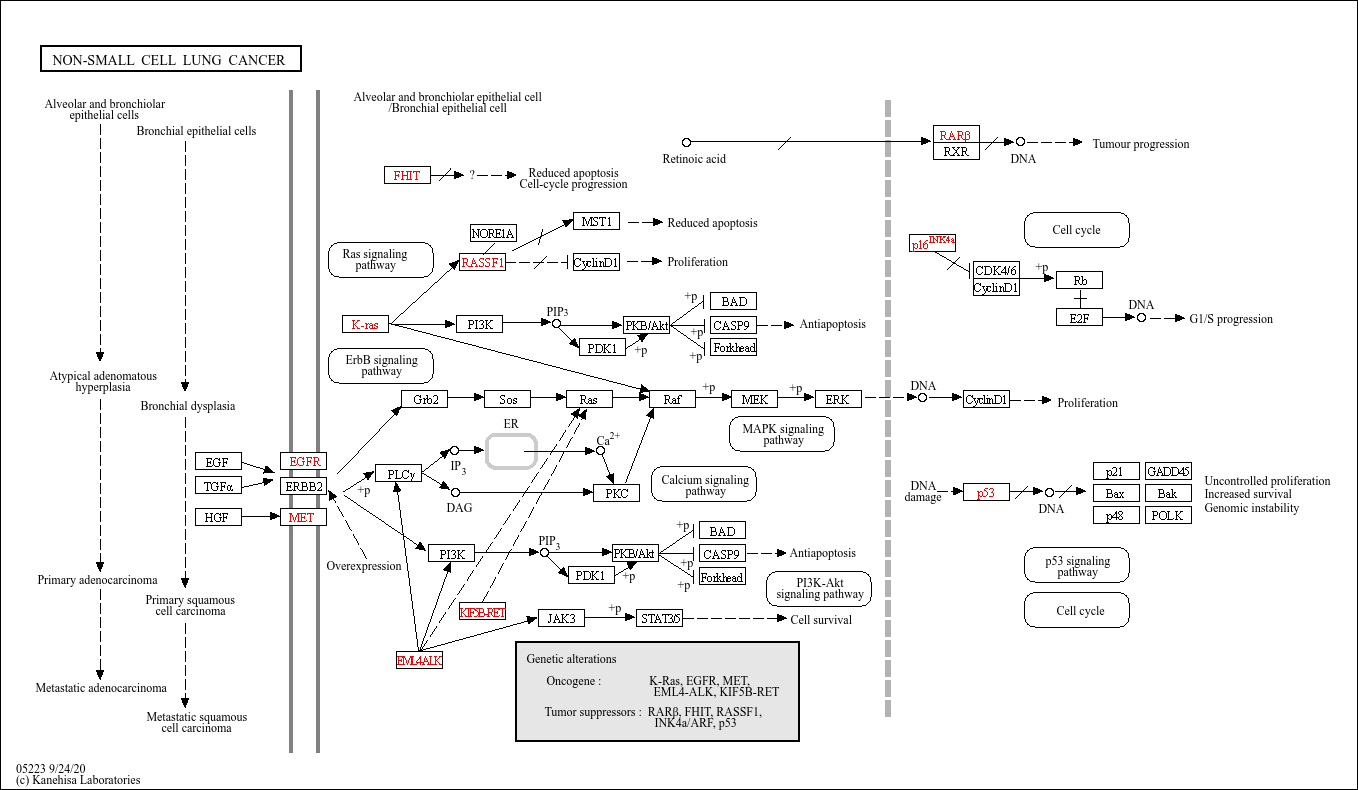

In [48]:
pathway_image = Image(kegg_get(pathway_id, "image").read())
display(pathway_image)

Save the pathway map image to a file with following (1pts): 
1. pathway = KGML_parser.read(kegg_get("X", "kgml")), X is the pathway ID. 
2. print the pathway.
3. canvas.import_imagemap=True
4. canvas.draw('Yourpath/map.pdf')

**I am getting errors with the pathway_id** 

see below.

In [37]:
# Save the pathway map image to a file
pathway = KGML_parser.read(kegg_get(pathway_id, "kgml"))
print(pathway)
canvas.import_imagemap=True

#describe the path for the pdf file
pathway_map_pdf= r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Homeworks\BioserviesHW\Pathway.pdf'
canvas.draw(pathway_map_pdf)

HTTPError: HTTP Error 404: Not Found

### I am going to instead extract the hsa number and use that like in the notes. 

In [62]:
data_dict = k.parse(query_result)
#using the parse method as described in the official documentation
#I am going to parse out the query result into a dictionary
temp = data_dict['DIS_PATHWAY']
#temporary data struction to extract the values of dis path
print(temp)

WARNING [bioservices:keggparser:115]:  Found keyword DIS_PATHWAY, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (H00014                      Disease) into github.com/bioservices. Thanks T.C.
WARNING [bioservices:keggparser:115]:  Found keyword DIS_PATHWAY, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (H00014                      Disease) into github.com/bioservices. Thanks T.C.
WARNING [bioservices:keggparser:115]:  Found keyword DIS_PATHWAY, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (H00014                      Disease) into github.com/bioservices. Thanks T.C.


hsa05223  Non-small cell lung cancer


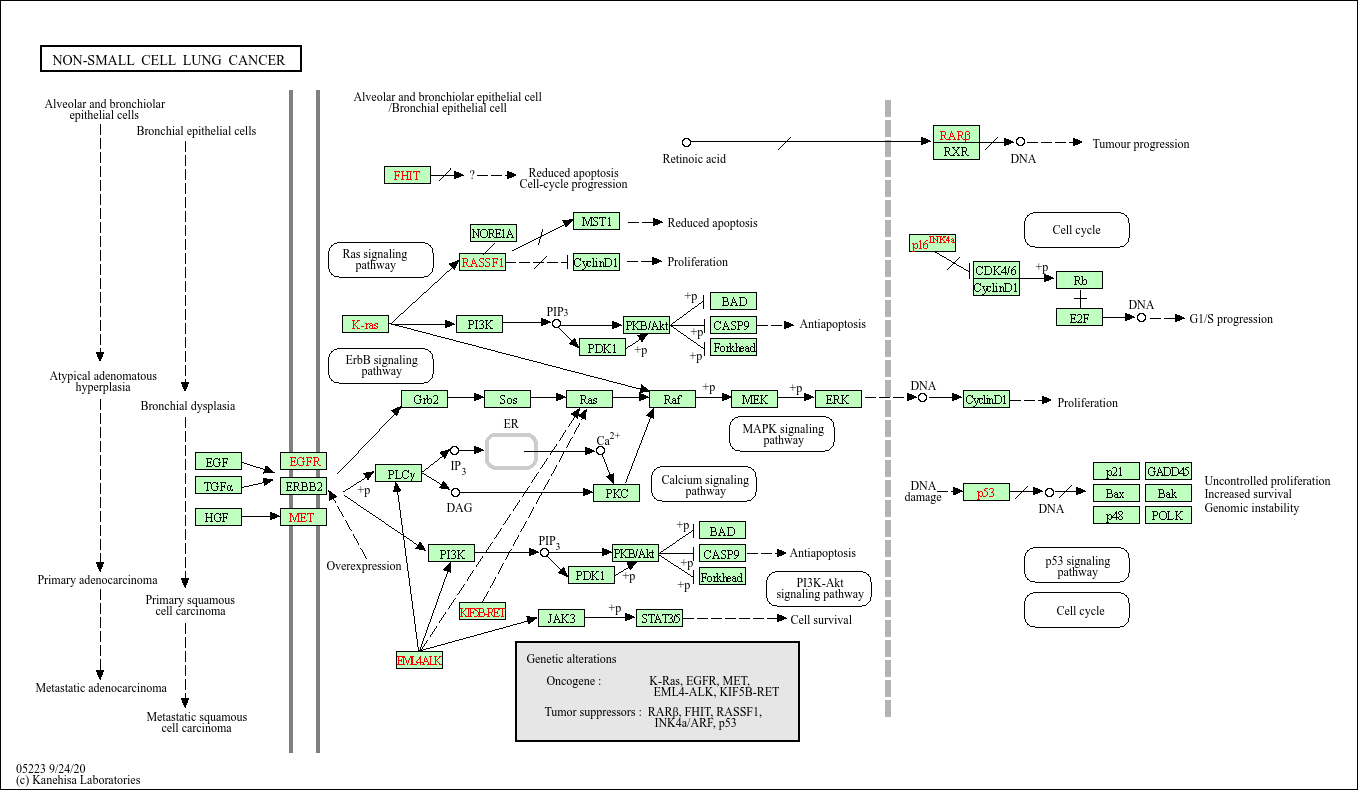

In [63]:
hsa_num = temp.split()[0]
#split temp based on white spaces and get the hsa number which is the first index
pathway_image = Image(kegg_get(hsa_num, "image").read())
display(pathway_image)
#double checking both images look the same, yes it does appear that they look the same. 

# REPLACING THE PATH ID WITH THE HSA NUMBER ALLOWS ME TO EXTRACT THE KGML INFORMATION AND SAVE THE PDF
# THE TWO PDF'S ARE IDENTICAL

In [65]:
# Save the pathway image to a file
pathway = KGML_parser.read(kegg_get(hsa_num, "kgml"))
print(pathway)
canvas = KGMLCanvas(pathway)
canvas.import_imagemap=True

#describe the path for the pdf file
pathway_map_pdf= r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Homeworks\BioserviesHW\Pathway.pdf'
canvas.draw(pathway_map_pdf)

Pathway: Non-small cell lung cancer
KEGG ID: path:hsa05223
Image file: https://www.kegg.jp/kegg/pathway/hsa/hsa05223.png
Organism: hsa
Entries: 69
Entry types:
	gene: 51
	group: 3
	compound: 6
	map: 9

